In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.preprocessing import StandardScaler, LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import time



In [3]:
def plot_confusion(cm, classes, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def evaluate_model(y_true, y_pred, class_labels, title):
    print(f"\n📌 Results for {title}")
    print(classification_report(y_true, y_pred, target_names=class_labels))
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion(cm, class_labels, title)


In [5]:
# Load 2-class dataset
df = pd.read_parquet("/content/drive/MyDrive/CICIoT2023/2class/part.0.parquet")

# Features and label
X = df.drop('label', axis=1)
y = df['label']

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)


🕒 Random Forest time: 2.33 seconds

📌 Results for Random Forest (2-class)
              precision    recall  f1-score   support

      Attack       1.00      0.99      1.00      1690
      Benign       0.99      1.00      1.00      1690

    accuracy                           1.00      3380
   macro avg       1.00      1.00      1.00      3380
weighted avg       1.00      1.00      1.00      3380



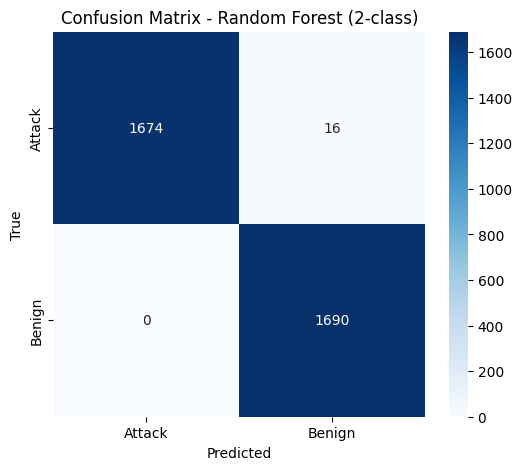

In [6]:
start = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
end = time.time()
print(f"🕒 Random Forest time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_rf, class_names, "Random Forest (2-class)")



🕒 Logistic Regression time: 0.09 seconds

📌 Results for Logistic Regression (2-class)
              precision    recall  f1-score   support

      Attack       0.99      0.97      0.98      1690
      Benign       0.97      0.99      0.98      1690

    accuracy                           0.98      3380
   macro avg       0.98      0.98      0.98      3380
weighted avg       0.98      0.98      0.98      3380



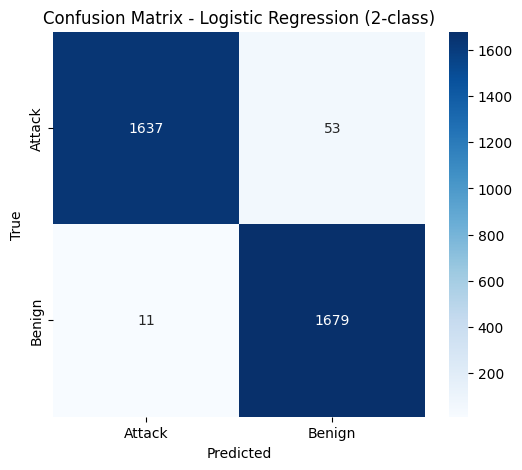

In [7]:
start = time.time()
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
end = time.time()
print(f"🕒 Logistic Regression time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_lr, class_names, "Logistic Regression (2-class)")


🕒 AdaBoost time: 2.81 seconds

📌 Results for AdaBoost (2-class)
              precision    recall  f1-score   support

      Attack       1.00      0.99      0.99      1690
      Benign       0.99      1.00      0.99      1690

    accuracy                           0.99      3380
   macro avg       0.99      0.99      0.99      3380
weighted avg       0.99      0.99      0.99      3380



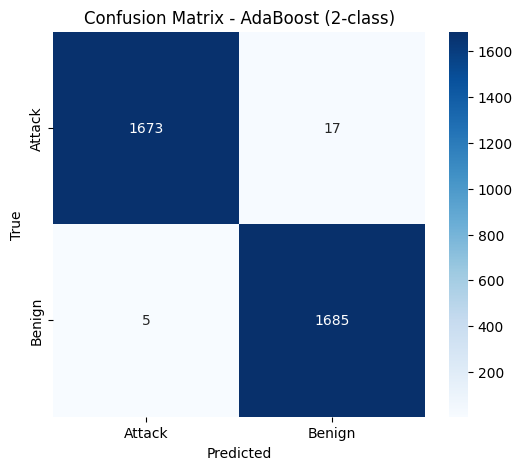

In [8]:
start = time.time()
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
end = time.time()
print(f"🕒 AdaBoost time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_ada, class_names, "AdaBoost (2-class)")


🕒 Perceptron time: 0.02 seconds

📌 Results for Perceptron (2-class)
              precision    recall  f1-score   support

      Attack       0.96      0.98      0.97      1690
      Benign       0.98      0.96      0.97      1690

    accuracy                           0.97      3380
   macro avg       0.97      0.97      0.97      3380
weighted avg       0.97      0.97      0.97      3380



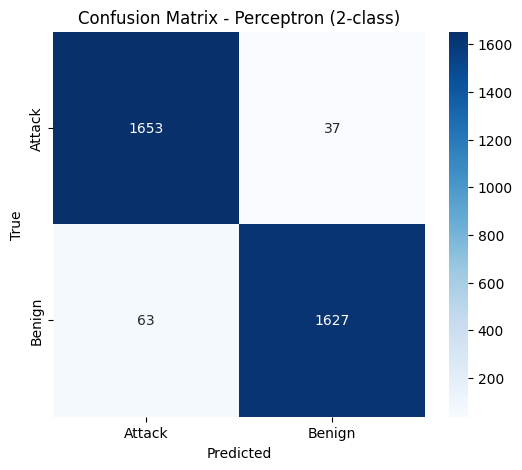

In [9]:
start = time.time()
perc = Perceptron(max_iter=1000)
perc.fit(X_train, y_train)
y_pred_perc = perc.predict(X_test)
end = time.time()
print(f"🕒 Perceptron time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_perc, class_names, "Perceptron (2-class)")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
🕒 Deep Neural Network time: 3.43 seconds

📌 Results for Deep Neural Network (2-class)
              precision    recall  f1-score   support

      Attack       1.00      0.97      0.99      1690
      Benign       0.98      1.00      0.99      1690

    accuracy                           0.99      3380
   macro avg       0.99      0.99      0.99      3380
weighted avg       0.99      0.99      0.99      3380



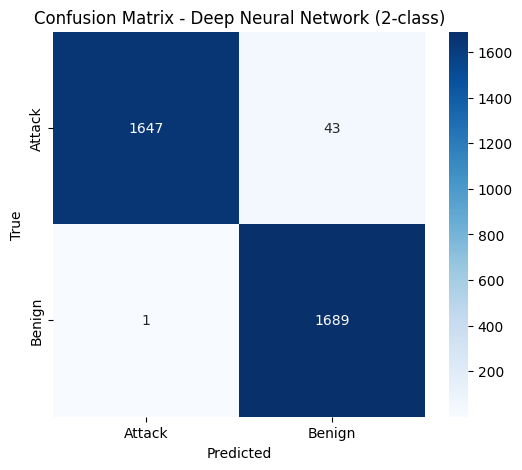

In [10]:
start = time.time()
dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn.fit(X_train, y_train, epochs=10, batch_size=512, verbose=0)
y_pred_dnn = (dnn.predict(X_test) > 0.5).astype(int).flatten()
end = time.time()
print(f"🕒 Deep Neural Network time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_dnn, class_names, "Deep Neural Network (2-class)")


In [12]:
# === 📦 Load & Preprocess 8-Class Dataset ===
import pandas as pd
import glob

# 8-CLASS FULL (multi-part)
file_paths = sorted(glob.glob("/content/drive/MyDrive/CICIoT2023/8class/*.parquet"))
df = pd.concat([pd.read_parquet(fp) for fp in file_paths], ignore_index=True)

X = df.drop('label', axis=1)
y = df['label']

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)


🕒 Random Forest time: 72.27 seconds

📌 Results for Random Forest (8-class)
                precision    recall  f1-score   support

        Benign       0.87      0.94      0.90      6760
   Brute Force       0.82      0.83      0.82      4323
          DDoS       1.00      1.00      1.00      6760
           DoS       1.00      1.00      1.00      6760
         Mirai       1.00      1.00      1.00      6760
Reconnaissance       0.88      0.83      0.85      6760
      Spoofing       0.90      0.83      0.86      6760
     Web-Based       0.75      0.81      0.78      4322

      accuracy                           0.91     49205
     macro avg       0.90      0.90      0.90     49205
  weighted avg       0.91      0.91      0.91     49205



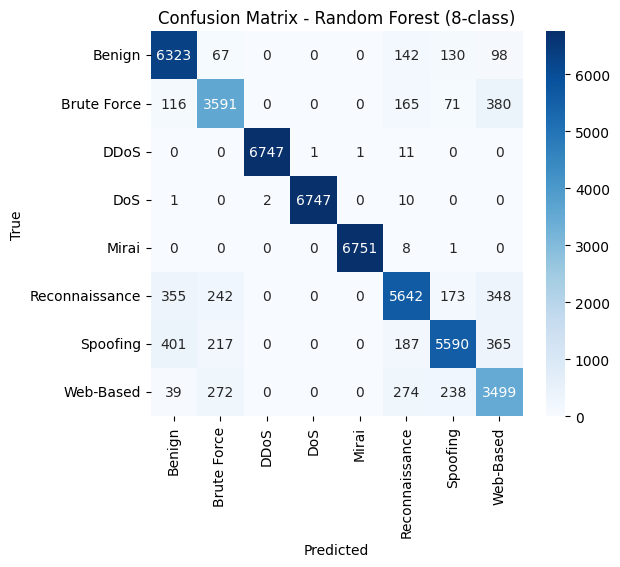

In [13]:
from sklearn.ensemble import RandomForestClassifier
import time

start = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
end = time.time()

print(f"🕒 Random Forest time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_rf, class_names, "Random Forest (8-class)")


🕒 Logistic Regression time: 28.94 seconds

📌 Results for Logistic Regression (8-class)
                precision    recall  f1-score   support

        Benign       0.61      0.79      0.69      6760
   Brute Force       0.42      0.33      0.37      4323
          DDoS       0.81      0.61      0.70      6760
           DoS       0.68      0.88      0.77      6760
         Mirai       1.00      0.99      0.99      6760
Reconnaissance       0.58      0.53      0.56      6760
      Spoofing       0.65      0.60      0.62      6760
     Web-Based       0.39      0.36      0.37      4322

      accuracy                           0.67     49205
     macro avg       0.64      0.64      0.63     49205
  weighted avg       0.67      0.67      0.66     49205



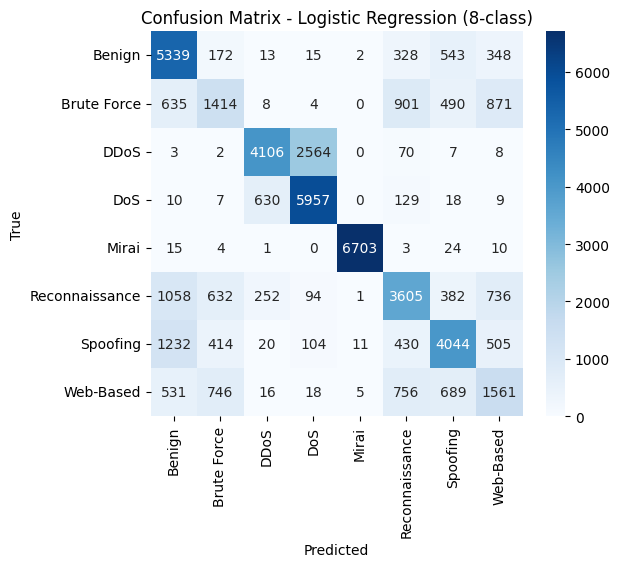

In [14]:
from sklearn.linear_model import LogisticRegression

start = time.time()
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
end = time.time()

print(f"🕒 Logistic Regression time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_lr, class_names, "Logistic Regression (8-class)")


🕒 AdaBoost time: 61.26 seconds

📌 Results for AdaBoost (8-class)
                precision    recall  f1-score   support

        Benign       0.66      0.59      0.62      6760
   Brute Force       0.86      0.45      0.59      4323
          DDoS       1.00      0.94      0.97      6760
           DoS       0.98      0.98      0.98      6760
         Mirai       0.99      0.98      0.99      6760
Reconnaissance       0.56      0.79      0.66      6760
      Spoofing       0.58      0.77      0.66      6760
     Web-Based       0.57      0.33      0.42      4322

      accuracy                           0.76     49205
     macro avg       0.77      0.73      0.74     49205
  weighted avg       0.78      0.76      0.76     49205



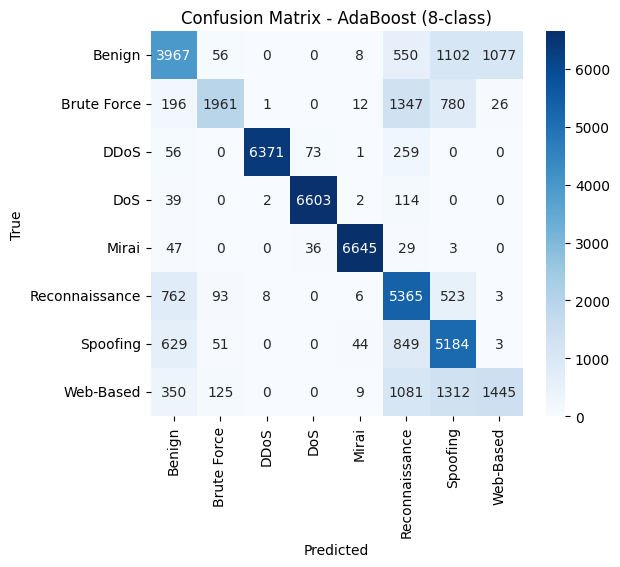

In [15]:
from sklearn.ensemble import AdaBoostClassifier

start = time.time()
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
end = time.time()

print(f"🕒 AdaBoost time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_ada, class_names, "AdaBoost (8-class)")


🕒 Perceptron time: 4.38 seconds

📌 Results for Perceptron (8-class)
                precision    recall  f1-score   support

        Benign       0.67      0.47      0.55      6760
   Brute Force       0.23      0.36      0.28      4323
          DDoS       0.84      0.48      0.61      6760
           DoS       0.59      0.93      0.72      6760
         Mirai       0.96      0.99      0.98      6760
Reconnaissance       0.43      0.40      0.42      6760
      Spoofing       0.77      0.41      0.54      6760
     Web-Based       0.28      0.41      0.33      4322

      accuracy                           0.57     49205
     macro avg       0.60      0.56      0.55     49205
  weighted avg       0.63      0.57      0.58     49205



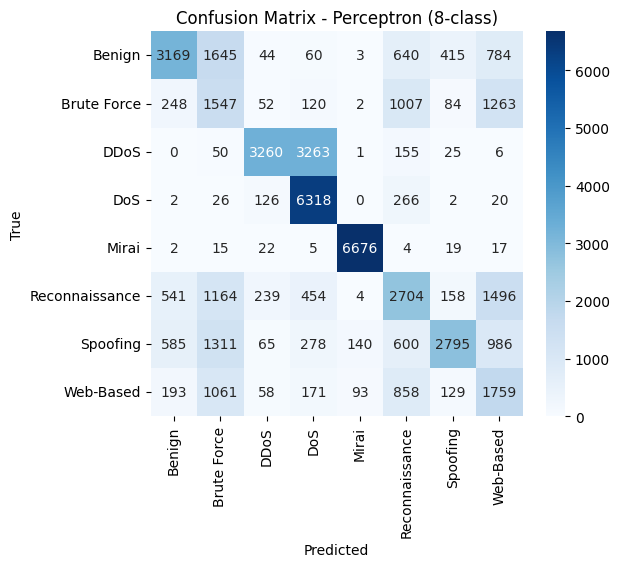

In [16]:
from sklearn.linear_model import Perceptron

start = time.time()
perc = Perceptron(max_iter=1000)
perc.fit(X_train, y_train)
y_pred_perc = perc.predict(X_test)
end = time.time()

print(f"🕒 Perceptron time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_perc, class_names, "Perceptron (8-class)")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1538/1538 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
🕒 Deep Neural Network time: 26.56 seconds

📌 Results for Deep Neural Network (8-class)
                precision    recall  f1-score   support

        Benign       0.72      0.80      0.76      6760
   Brute Force       0.52      0.49      0.50      4323
          DDoS       0.82      0.73      0.77      6760
           DoS       0.76      0.83      0.79      6760
         Mirai       1.00      1.00      1.00      6760
Reconnaissance       0.81      0.57      0.67      6760
      Spoofing       0.82      0.64      0.72      6760
     Web-Based       0.42      0.72      0.53      4322

      accuracy                           0.73     49205
     macro avg       0.73      0.72      0.72     49205
  weighted avg       0.76      0.73      0.74     49205



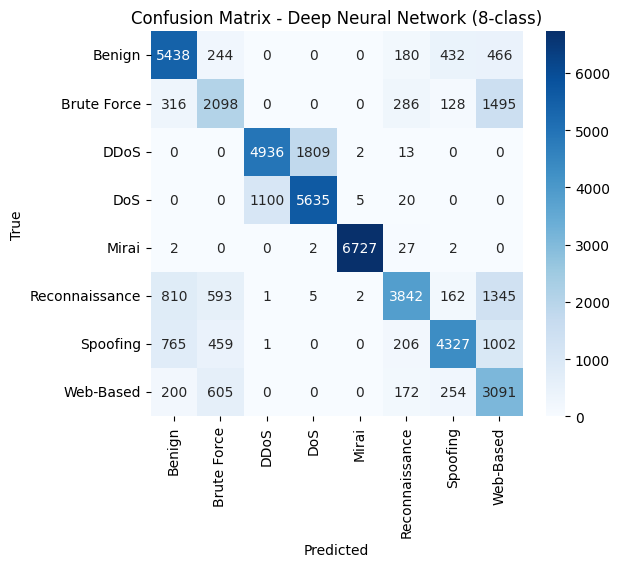

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

y_train_cat = to_categorical(y_train, num_classes=len(class_names))
y_test_cat = to_categorical(y_test, num_classes=len(class_names))

start = time.time()
dnn = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(class_names), activation='softmax')
])
dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

dnn.fit(X_train, y_train_cat, epochs=10, batch_size=512, verbose=0)
y_pred_dnn = np.argmax(dnn.predict(X_test), axis=1)
end = time.time()

print(f"🕒 Deep Neural Network time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_dnn, class_names, "Deep Neural Network (8-class)")
